In [541]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [164]:
train_df = pd.read_csv('../input/analytics-vidhya-jobathon/train_Df64byy.csv')
test_df = pd.read_csv('../input/analytics-vidhya-jobathon/test_YCcRUnU.csv')

In [205]:
train_df.shape, test_df.shape

((50882, 14), (21805, 13))

In [206]:
train_df = train_df.set_index('ID')
test_df = test_df.set_index('ID')

In [207]:
missing_pcdf = pd.concat([train_df.isna().sum()/train_df.shape[0] * 100, test_df.isna().sum()/train_df.shape[0] * 100], axis=1).astype(float).rename(columns={0: '% missing train', 1: '% missing test'})

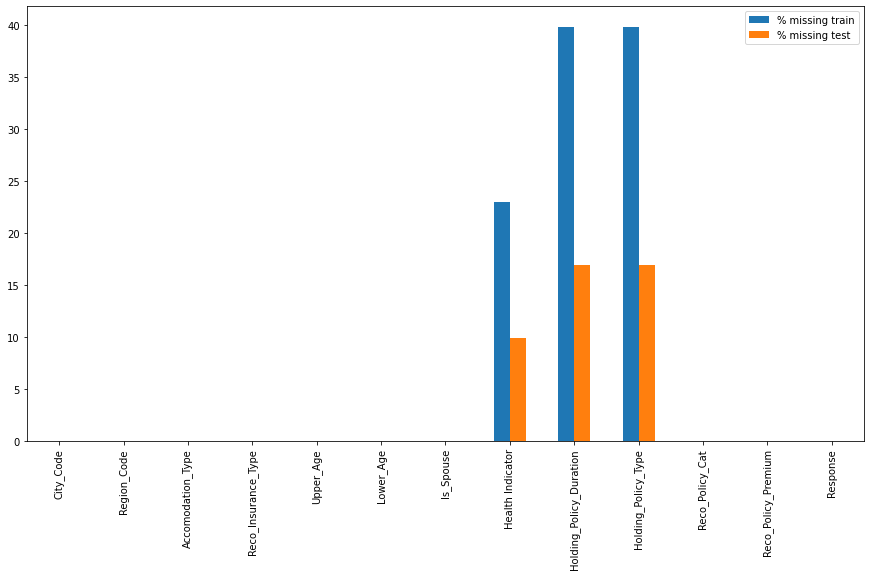

In [208]:
missing_pcdf.plot(kind='bar');

In [209]:
dtypes_df = pd.concat([train_df.dtypes, test_df.dtypes], axis=1).rename(columns={0: 'Train', 1: 'Test'})

In [210]:
plt.rcParams['figure.figsize'] = 15, 8

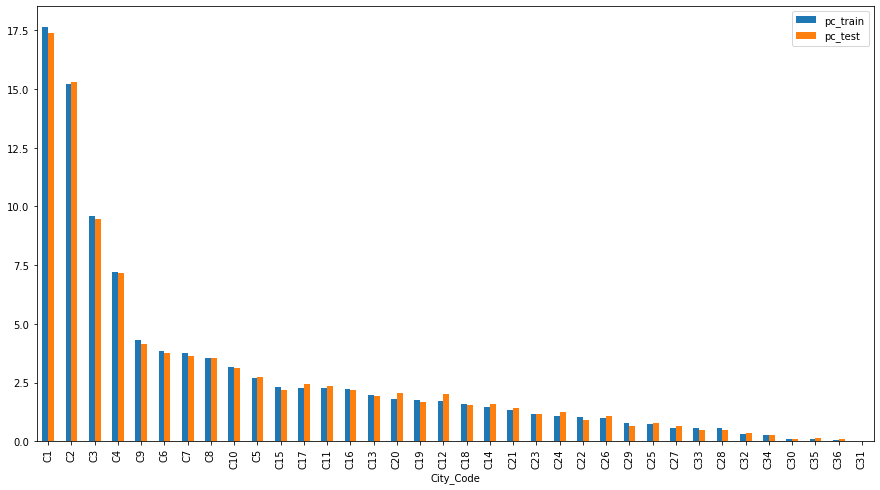

In [211]:
feature = 'City_Code'
cc_pc_train = train_df[feature].value_counts(normalize=True).mul(100).rename('pc_train').to_frame().reset_index().rename(columns={'index':feature})
cc_pc_test = test_df[feature].value_counts(normalize=True).mul(100).rename('pc_test').to_frame().reset_index().rename(columns={'index':feature})
total_cc_pc = cc_pc_train.merge(cc_pc_test, on=feature)
total_cc_pc.set_index(feature).plot(kind='bar');

More or less the same distribution

In [212]:
train_df['Region_Code'] = train_df['Region_Code'].astype(str)
test_df['Region_Code'] = test_df['Region_Code'].astype(str)

In [213]:
feature = 'Region_Code'
rc_pc_train = train_df[feature].value_counts(normalize=True).mul(100).rename('pc_train').to_frame().reset_index().rename(columns={'index':feature})
rc_pc_test = test_df[feature].value_counts(normalize=True).mul(100).rename('pc_test').to_frame().reset_index().rename(columns={'index':feature})
total_rc_pc = rc_pc_train.merge(rc_pc_test, on=feature)
# total_rc_pc.set_index(feature).plot(kind='bar');

In [214]:
((total_rc_pc['pc_train'] - total_rc_pc['pc_test']) / total_rc_pc['pc_train']).mul(100)

0        -6.952152
1         6.659940
2         7.299256
3       -24.666518
4         7.299256
           ...    
4467   -366.700298
4468   -133.350149
4469   -366.700298
4470   -133.350149
4471   -133.350149
Length: 4472, dtype: float64

Interesting, will deal with this later

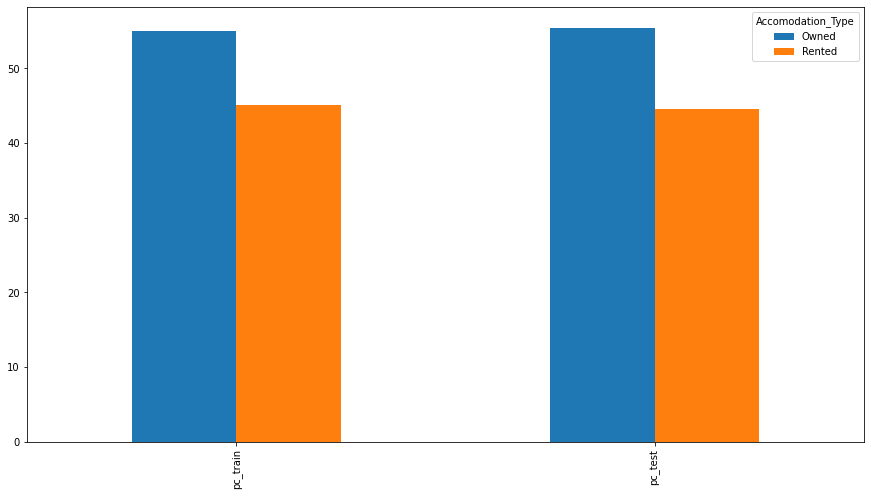

In [215]:
feature = 'Accomodation_Type'
acc_pc_train = train_df[feature].value_counts(normalize=True).mul(100).rename('pc_train').to_frame().reset_index().rename(columns={'index':feature})
acc_pc_test = test_df[feature].value_counts(normalize=True).mul(100).rename('pc_test').to_frame().reset_index().rename(columns={'index':feature})
total_acc_pc = acc_pc_train.merge(acc_pc_test, on=feature)
total_acc_pc.set_index(feature).T.plot(kind='bar');

A little distribution.

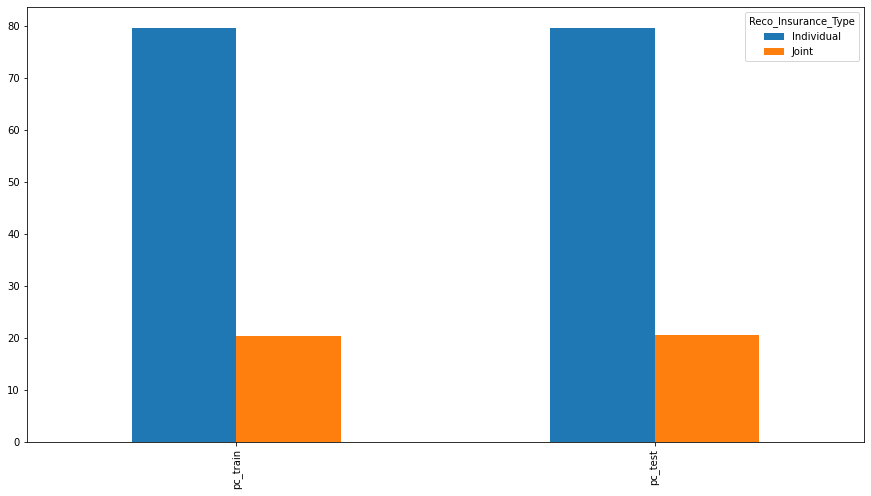

In [216]:
feature = 'Reco_Insurance_Type'
rit_pc_train = train_df[feature].value_counts(normalize=True).mul(100).rename('pc_train').to_frame().reset_index().rename(columns={'index':feature})
rit_pc_test = test_df[feature].value_counts(normalize=True).mul(100).rename('pc_test').to_frame().reset_index().rename(columns={'index':feature})
total_rit_pc = rit_pc_train.merge(rit_pc_test, on=feature)
total_rit_pc.set_index(feature).T.plot(kind='bar');

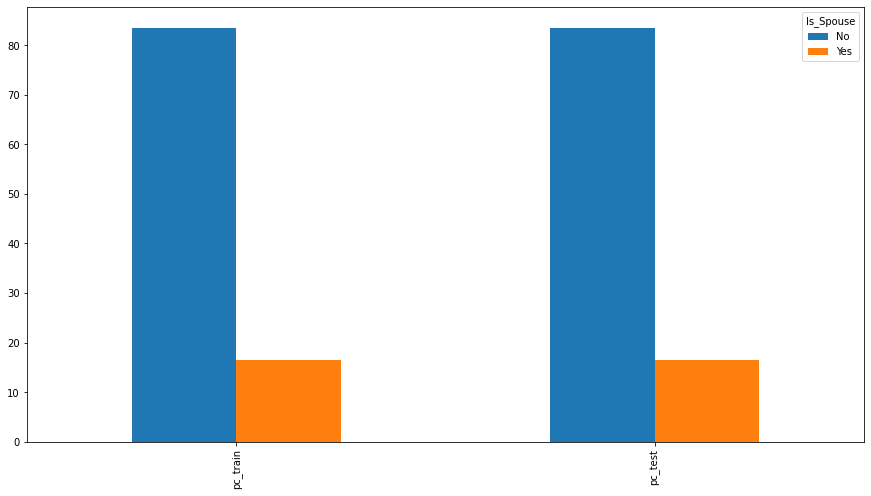

In [217]:
feature = 'Is_Spouse'
is_pc_train = train_df[feature].value_counts(normalize=True).mul(100).rename('pc_train').to_frame().reset_index().rename(columns={'index':feature})
is_pc_test = test_df[feature].value_counts(normalize=True).mul(100).rename('pc_test').to_frame().reset_index().rename(columns={'index':feature})
total_is_pc = is_pc_train.merge(is_pc_test, on=feature)
total_is_pc.set_index(feature).T.plot(kind='bar');

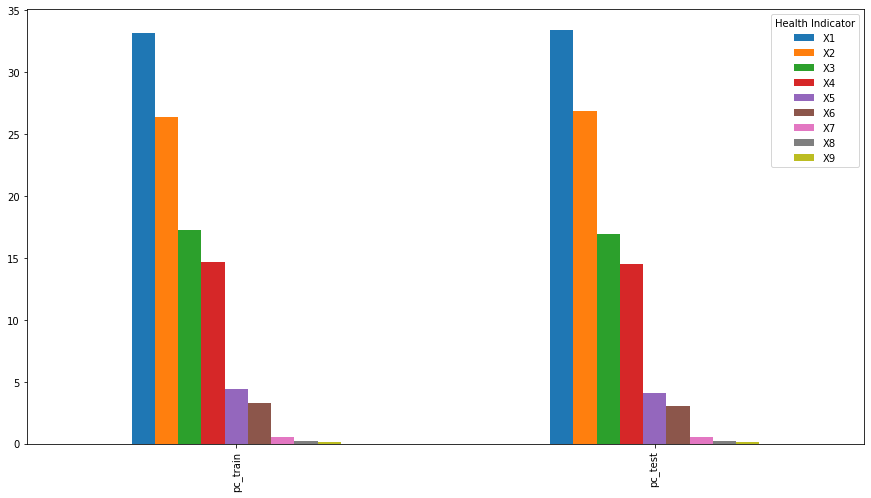

In [218]:
feature = 'Health Indicator'
hi_pc_train = train_df[feature].value_counts(normalize=True).mul(100).rename('pc_train').to_frame().reset_index().rename(columns={'index':feature})
hi_pc_test = test_df[feature].value_counts(normalize=True).mul(100).rename('pc_test').to_frame().reset_index().rename(columns={'index':feature})
total_hi_pc = hi_pc_train.merge(hi_pc_test, on=feature)
total_hi_pc.set_index(feature).T.plot(kind='bar');

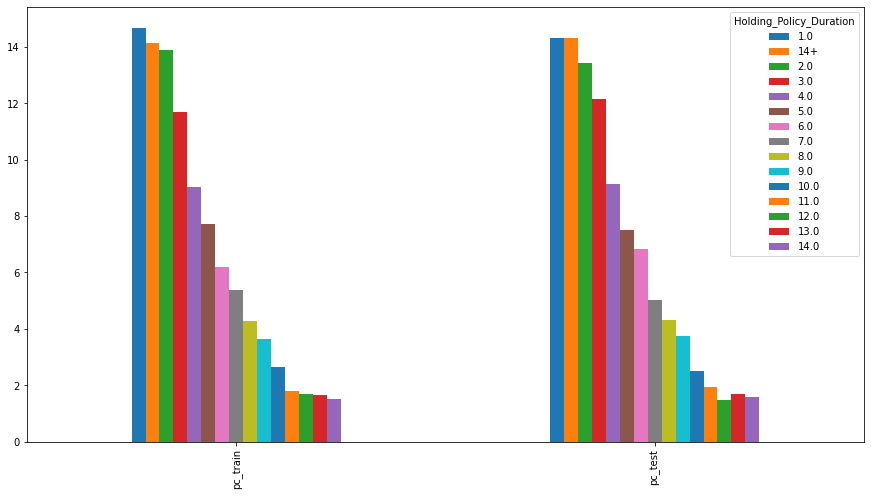

In [219]:
feature = 'Holding_Policy_Duration'
hi_pc_train = train_df[feature].value_counts(normalize=True).mul(100).rename('pc_train').to_frame().reset_index().rename(columns={'index':feature})
hi_pc_test = test_df[feature].value_counts(normalize=True).mul(100).rename('pc_test').to_frame().reset_index().rename(columns={'index':feature})
total_hi_pc = hi_pc_train.merge(hi_pc_test, on=feature)
total_hi_pc.set_index(feature).T.plot(kind='bar');

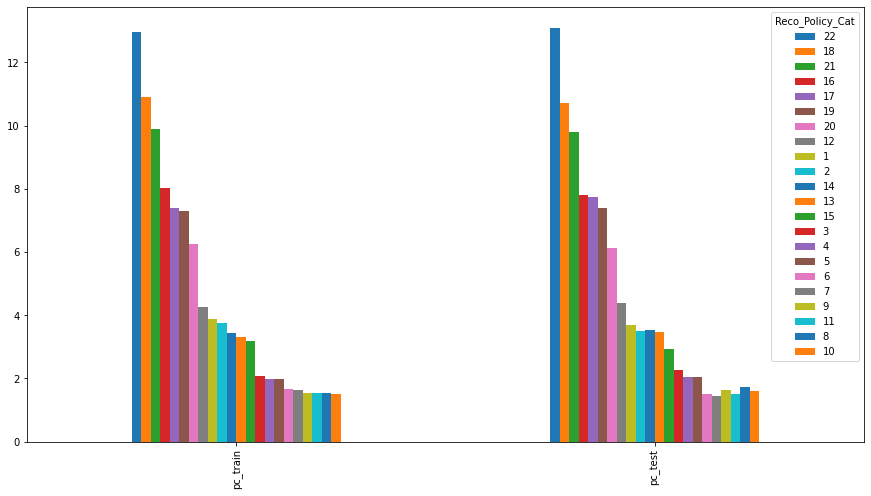

In [220]:
feature = 'Reco_Policy_Cat'
rpc_pc_train = train_df[feature].value_counts(normalize=True).mul(100).rename('pc_train').to_frame().reset_index().rename(columns={'index':feature})
rpc_pc_test = test_df[feature].value_counts(normalize=True).mul(100).rename('pc_test').to_frame().reset_index().rename(columns={'index':feature})
total_rpc_pc = rpc_pc_train.merge(rpc_pc_test, on=feature)
total_rpc_pc.set_index(feature).T.plot(kind='bar');

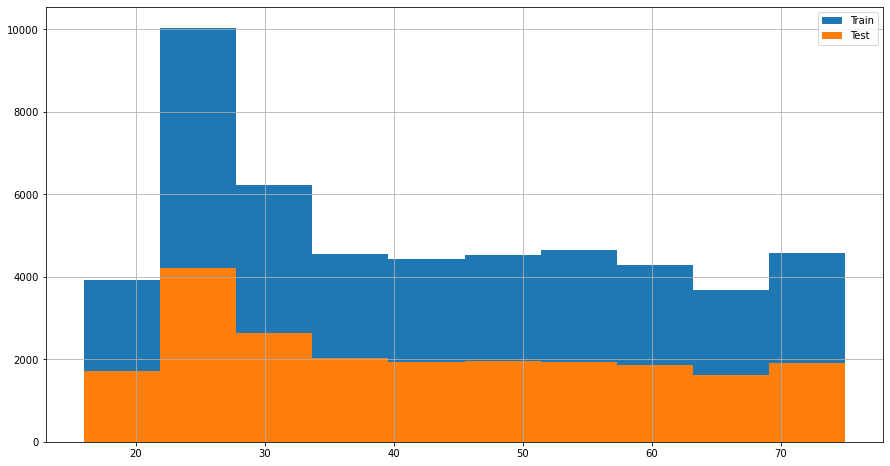

In [221]:
ax = train_df['Lower_Age'].hist(label='Train')
test_df['Lower_Age'].hist(ax=ax, label='Test')
plt.legend();

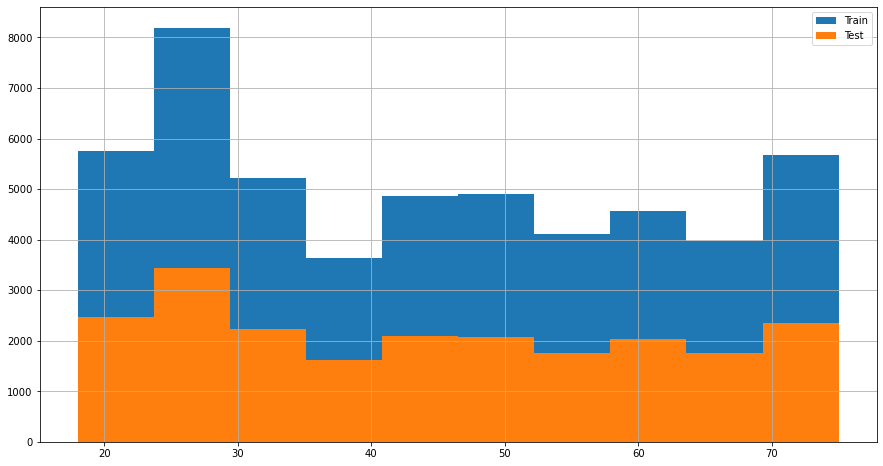

In [222]:
ax = train_df['Upper_Age'].hist(label='Train')
test_df['Upper_Age'].hist(ax=ax, label='Test')
plt.legend();

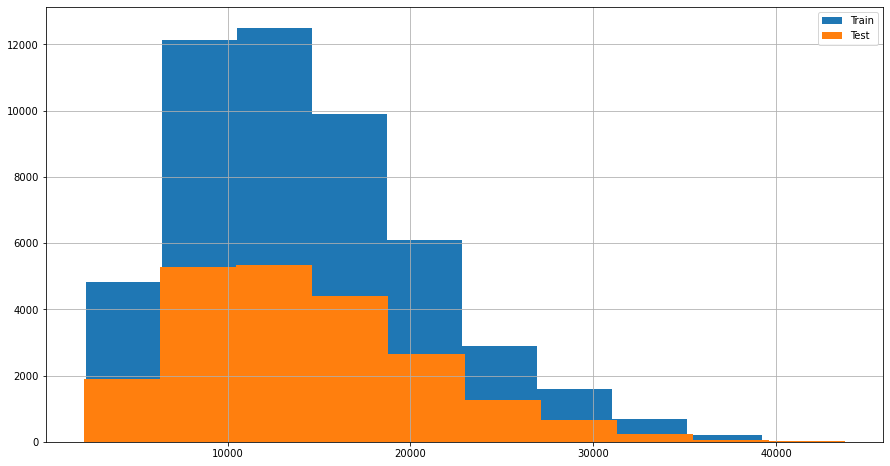

In [223]:
feature = 'Reco_Policy_Premium'
ax = train_df[feature].hist(label='Train')
test_df[feature].hist(ax=ax, label='Test')
plt.legend();

In [224]:
train_df['Response'].value_counts(normalize=True).mul(100)

0    76.005267
1    23.994733
Name: Response, dtype: float64

In [225]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [226]:
iv_df, iv = data_vars(train_df, train_df.Response)

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [227]:
iv_df[iv_df['VAR_NAME'] == 'Reco_Policy_Premium'].sort_values(by='EVENT_RATE', ascending=False).head(50)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
5396,Reco_Policy_Premium,16302.0,43350.4,16946,4158.0,0.245368,12788.0,0.754632,0.340568,0.330670,0.029495,0.00044
5395,Reco_Policy_Premium,10496.0,16296.0,16964,4028.0,0.237444,12936.0,0.762556,0.329921,0.334497,-0.013776,0.00044
5394,Reco_Policy_Premium,2280.0,10494.0,16972,4023.0,0.237037,12949.0,0.762963,0.329511,0.334833,-0.016022,0.00044


In [228]:
unique_rc_tr = train_df['Region_Code'].sort_values().unique()
unique_rc_te = test_df['Region_Code'].sort_values().unique()

In [229]:
cc_r = train_df[['City_Code', 'Response']].groupby('City_Code').agg(['count', 'sum'])
cc_r.columns = ['total', 'responded']
cc_r['pc_res'] = cc_r['responded'] / cc_r['total']
cc_r =cc_r.reset_index()
cc_r.sort_values(by='pc_res').head(10)

,City_Code,total,responded,pc_res
24,C31,15,2,0.133333
29,C36,36,5,0.138889
6,C15,1186,253,0.213322
18,C26,499,108,0.216433
1,C10,1611,364,0.225947
3,C12,868,198,0.228111
13,C21,679,155,0.228277
8,C17,1159,265,0.228645
12,C20,926,212,0.228942
31,C5,1364,314,0.230205


In [230]:
iv_df['VAR_NAME'].unique()

array(['City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype=object)

In [413]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [414]:
accomo_encoder = LabelEncoder()
accomo_encoder.fit(train_df_copy['Accomodation_Type'])
train_df_copy['Accomodation_Type'] = accomo_encoder.transform(train_df_copy['Accomodation_Type'])

In [415]:
rit_encoder = LabelEncoder()
rit_encoder.fit(train_df_copy['Reco_Insurance_Type'])
train_df_copy['Reco_Insurance_Type'] = rit_encoder.transform(train_df_copy['Reco_Insurance_Type'])

In [416]:
spouse_encoder = LabelEncoder()
spouse_encoder.fit(train_df_copy['Is_Spouse'])
train_df_copy['Is_Spouse'] = spouse_encoder.transform(train_df_copy['Is_Spouse'])

In [419]:
ohe_rpc = OneHotEncoder(drop='first')

ohe_rpc.fit(train_df_copy['Reco_Policy_Cat'].values.reshape(-1, 1))

transformed_rpc = ohe_rpc.transform(train_df_copy['Reco_Policy_Cat'].values.reshape(-1, 1)).toarray()

In [420]:
transformed_rpc = pd.DataFrame(transformed_rpc).astype(int).rename(
    columns={i:f'rpc_{i}' for i in np.arange(0, 21)}
)

In [421]:
transformed_rpc.index = train_df_copy.index

In [422]:
train_df_copy = pd.concat([train_df_copy, transformed_rpc], axis=1)

In [425]:
pd.set_option('display.max_columns', 100)

In [426]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

## Imputing Health Indicator

In [460]:
health_ind_prob = train_df_copy['Health Indicator'].value_counts(normalize=True).to_dict()

In [461]:
nan_count_hi = train_df_copy['Health Indicator'].isna().sum()

In [462]:
to_fill = np.random.choice(list(health_ind_prob.keys()), 
                 p=list(health_ind_prob.values()),
                 size=nan_count_hi).astype('object')

In [463]:
train_df_copy.loc[train_df_copy['Health Indicator'].isna(), 'Health Indicator'] = to_fill

## Imputing Holding_Policy_Duration

In [477]:
hpd_prob = train_df_copy['Holding_Policy_Duration'].value_counts(normalize=True).to_dict()

In [479]:
hpd_null_idx = train_df_copy[train_df_copy['Holding_Policy_Duration'].isna()].index

In [481]:
nan_count_hpd = train_df_copy['Holding_Policy_Duration'].isna().sum()

In [482]:
to_fill = np.random.choice(list(hpd_prob.keys()), 
                 p=list(hpd_prob.values()),
                 size=len(hpd_null_idx)).astype('object')

In [483]:
train_df_copy.loc[hpd_null_idx, 'Holding_Policy_Duration'] = to_fill

In [484]:
train_df_copy['Holding_Policy_Duration'] = train_df_copy['Holding_Policy_Duration'].replace('14+', '15.0')

In [485]:
train_df_copy['Holding_Policy_Duration'] = train_df_copy['Holding_Policy_Duration'].astype(float)

## Imputing Holding_Policy_Type

In [487]:
hpt_null_idx = train_df_copy[train_df_copy['Holding_Policy_Type'].isna()].index

In [488]:
hpt_prob = train_df_copy['Holding_Policy_Type'].drop(hpt_null_idx).value_counts(normalize=True).to_dict()

In [490]:
to_fill = np.random.choice(list(hpt_prob.keys()), 
                 p=list(hpt_prob.values()),
                 size=len(hpt_null_idx)).astype('object')

In [493]:
train_df_copy.loc[hpt_null_idx, 'Holding_Policy_Type'] = to_fill

In [504]:
premium_scaler = MinMaxScaler()

premium_scaler.fit(train_df_copy['Reco_Policy_Premium'].values.reshape(-1,1))

arr = premium_scaler.transform(train_df_copy['Reco_Policy_Premium'].values.reshape(-1,1))

train_df_copy['Reco_Policy_Premium'] = arr.ravel()

In [512]:
upper_scaler = MinMaxScaler()

upper_scaler.fit(train_df_copy['Upper_Age'].values.reshape(-1,1))

arr = upper_scaler.transform(train_df_copy['Upper_Age'].values.reshape(-1,1))

train_df_copy['Upper_Age'] = arr.ravel()

In [514]:
lower_scaler = MinMaxScaler()

lower_scaler.fit(train_df_copy['Lower_Age'].values.reshape(-1,1))

arr = lower_scaler.transform(train_df_copy['Lower_Age'].values.reshape(-1,1))

train_df_copy['Lower_Age'] = arr.ravel()

In [530]:
ohe_hi = OneHotEncoder(drop='first')

ohe_hi.fit(train_df_copy['Health Indicator'].values.reshape(-1, 1))

arr = ohe_hi.transform(train_df_copy['Health Indicator'].values.reshape(-1, 1))

arr = arr.toarray()

df_arr = pd.DataFrame(arr, index=train_df_copy.index)

df_arr.columns = ['hi_' + str(i) for i in df_arr.columns]

train_df_copy = pd.concat([train_df_copy, df_arr], axis=1)

In [535]:
ohe_hpt = OneHotEncoder(drop='first')

ohe_hpt.fit(train_df_copy['Holding_Policy_Type'].values.reshape(-1, 1))

arr = ohe_hpt.transform(train_df_copy['Holding_Policy_Type'].values.reshape(-1, 1))

arr = arr.toarray()

df_arr = pd.DataFrame(arr, index=train_df_copy.index)

df_arr.columns = ['hpt_' + str(i) for i in df_arr.columns]

train_df_copy = pd.concat([train_df_copy, df_arr], axis=1)

In [538]:
features = ['Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Holding_Policy_Duration', 'Reco_Policy_Premium', 'rpc_0', 'rpc_1', 'rpc_2', 'rpc_3',
       'rpc_4', 'rpc_5', 'rpc_6', 'rpc_7', 'rpc_8', 'rpc_9', 'rpc_10',
       'rpc_11', 'rpc_12', 'rpc_13', 'rpc_14', 'rpc_15', 'rpc_16', 'rpc_17',
       'rpc_18', 'rpc_19', 'rpc_20', 'hi_0', 'hi_1', 'hi_2', 'hi_3', 'hi_4',
       'hi_5', 'hi_6', 'hi_7', 'hpt_0', 'hpt_1', 'hpt_2']

label = 'Response'

In [539]:
X = train_df_copy.loc[:, features]
y = train_df_copy.loc[:, label]

In [542]:
from sklearn.model_selection import train_test_split

In [549]:
model = LogisticRegression()

In [551]:
hpc_scaler = MinMaxScaler()

hpc_scaler.fit(train_df_copy['Holding_Policy_Duration'].values.reshape(-1, 1))

arr = hpc_scaler.transform(train_df_copy['Holding_Policy_Duration'].values.reshape(-1, 1))

train_df_copy['Holding_Policy_Duration'] = arr

In [552]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [553]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [557]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([3835, 1254]))

In [554]:
np.unique(model.predict(X_test), return_counts=True)

(array([0, 1]), array([5087,    2]))